In [1]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [3]:
data = np.loadtxt("/Users/wangfei/Documents/Courses/CS/CS412/Evan/HW/HW1/data.csv")
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [3]:
#polynomial kernel with degree 3
kPCA = KernelPCA(n_components=2, kernel='poly', degree = 3)
kPCA_transform = kPCA.fit_transform(trainFeatures)
#trainFeatures_transformed.shape   (312, 2)

## 1 Feature Extraction  
Python package "sklearn" was used. Figure 2.1 shows the two features extracted by Kernel PCA with polynomail kernel with degree 3. 

**a) Compare kernel PCA features with the features you selected from HW1. Do these features seem to better separate the data?**  
Yes. The features extracted by kernel PCA seems to be separating the data better. The features I used for HW1 are mean intensity and intensity standard deviation. Although these two features separate data pretty well, the gap between two groups are pretty narrow. But in this kPCA case, the two groups are widely separated and are thus better (see Figure 2.1). 

**b) Give the explained variance ratio for each of the two feature extractions given above. Is there one of the methods which explains more variance than the other? Is this what you expect? Explain your answer.**  


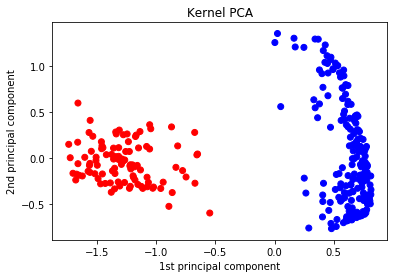

0.0031390867465473904

In [4]:
##Figure 2.1
img_path = '/Users/wangfei/Documents/Courses/CS/CS412/HW/HW2/Figures/'
mp.figure()
mp.title("Kernel PCA")
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
mp.scatter(kPCA_transform[:,0], kPCA_transform[:,1],c=colors)
mp.xlabel("1st principal component")
mp.ylabel("2nd principal component")
mp.savefig(img_path + 'Figure2_1.png', dpi = 300)
show() 

######## kernel PCA #########
explained_variance = np.var(kPCA_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio  #array([0.78807441, 0.21192559])
np.cumsum(explained_variance_ratio)  #array([0.78807441, 1.        ])

var = np.var(trainFeatures,0)
######## kernel PCA variance explained#########
explained_variance[0]/np.sum(var)  # 0.011673124960289095
explained_variance[1]/np.sum(var)  # 0.0031390867465473904 
#sum = 0.014812211706836486

In [6]:
## Use the two features that you created for your 2D graph in HW1 
def ExtractFeat(dataset,label):
    X = []   ##mean
    Y = []   ##std
    colors = []
    for index in range(len(dataset)):
        X.append(np.mean(dataset[index]))
        Y.append(np.std(dataset[index]))  
        if(label[index]=="1.0"):
            colors.append("b")
        else:
            colors.append("r")
    return [X, Y, colors];
    
##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;

In [6]:
##normalize two features
###training features
Xnorm = normalize(ExtractFeat(trainFeatures,trainDigits)[0])
Ynorm = normalize(ExtractFeat(trainFeatures,trainDigits)[1])
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))
###testing features
Xnorm_test = normalize(ExtractFeat(testFeatures,testDigits)[0])
Ynorm_test = normalize(ExtractFeat(testFeatures,testDigits)[1])
Xnorm_test = np.asarray(Xnorm_test)
Ynorm_test = np.asarray(Ynorm_test)
simpleTest = np.column_stack((Xnorm_test,Ynorm_test))



In [7]:
######## 1st HW two features #########
np.var(Xnorm)/np.sum(var)  #0.0017717496326050638
np.var(Ynorm)/np.sum(var)  #0.0024516214368288866
#sum = 0.00422337106943395


#logistic regression models 
lr_c1_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)
#Extra credit Using L1 penalty
lr_c1_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)

In [8]:
###2D training error
lr_c1_l2.score(simpleTrain,trainDigits), lr_c2_l2.score(simpleTrain,trainDigits)
#(0.7532051282051282, 0.8910256410256411)
lr_c1_l1.score(simpleTrain,trainDigits), lr_c2_l1.score(simpleTrain,trainDigits)
#(0.6698717948717948, 0.9519230769230769)

(0.6698717948717948, 0.9519230769230769)

In [10]:
###2D testing error
lr_c1_l2.score(simpleTest,testDigits), lr_c2_l2.score(simpleTest,testDigits)
#(0.7862289831865492, 0.899119295436349)
lr_c1_l1.score(simpleTest,testDigits), lr_c2_l1.score(simpleTest,testDigits)
#(0.6373098478783027, 0.9599679743795037)

(0.6373098478783027, 0.9599679743795037)

In [11]:
np.mean(cross_val_score(lr_c1_l2, simpleTrain, trainDigits, cv=10))  #0.7502486559139785
np.mean(cross_val_score(lr_c2_l2, simpleTrain, trainDigits, cv=10))   #0.8811155913978496
np.mean(cross_val_score(lr_c1_l1, simpleTrain, trainDigits, cv=10))    #0.6699932795698925
np.mean(cross_val_score(lr_c2_l1, simpleTrain, trainDigits, cv=10))     #0.9449327956989247

0.9449327956989247

In [2]:
xPred = []
yPred = []
for xP in range(-100,100):
    xP = xP/100
    for yP in range(-100,100):
        yP = yP/100
        xPred.append(xP)
        yPred.append(yP)

coordinate = list(zip(xPred,yPred))

[(-1.0, -1.0),
 (-1.0, -0.99),
 (-1.0, -0.98),
 (-1.0, -0.97),
 (-1.0, -0.96),
 (-1.0, -0.95),
 (-1.0, -0.94),
 (-1.0, -0.93),
 (-1.0, -0.92),
 (-1.0, -0.91),
 (-1.0, -0.9),
 (-1.0, -0.89),
 (-1.0, -0.88),
 (-1.0, -0.87),
 (-1.0, -0.86),
 (-1.0, -0.85),
 (-1.0, -0.84),
 (-1.0, -0.83),
 (-1.0, -0.82),
 (-1.0, -0.81),
 (-1.0, -0.8),
 (-1.0, -0.79),
 (-1.0, -0.78),
 (-1.0, -0.77),
 (-1.0, -0.76),
 (-1.0, -0.75),
 (-1.0, -0.74),
 (-1.0, -0.73),
 (-1.0, -0.72),
 (-1.0, -0.71),
 (-1.0, -0.7),
 (-1.0, -0.69),
 (-1.0, -0.68),
 (-1.0, -0.67),
 (-1.0, -0.66),
 (-1.0, -0.65),
 (-1.0, -0.64),
 (-1.0, -0.63),
 (-1.0, -0.62),
 (-1.0, -0.61),
 (-1.0, -0.6),
 (-1.0, -0.59),
 (-1.0, -0.58),
 (-1.0, -0.57),
 (-1.0, -0.56),
 (-1.0, -0.55),
 (-1.0, -0.54),
 (-1.0, -0.53),
 (-1.0, -0.52),
 (-1.0, -0.51),
 (-1.0, -0.5),
 (-1.0, -0.49),
 (-1.0, -0.48),
 (-1.0, -0.47),
 (-1.0, -0.46),
 (-1.0, -0.45),
 (-1.0, -0.44),
 (-1.0, -0.43),
 (-1.0, -0.42),
 (-1.0, -0.41),
 (-1.0, -0.4),
 (-1.0, -0.39),
 (-1.0, -0.38),

In [12]:
def pred(model):
    preds = model.predict(coordinate)
    cPred = []
    for i in range(len(coordinate)):
        if(preds[i] == "1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
    return cPred;            

In [13]:
def accuracy(model):
    preds = model.predict(simpleTrain)
    accuracy = accuracy_score(trainDigits,preds)
    return accuracy;
#accuracy for four models 
[accuracy(lr_c1_l2), accuracy(lr_c2_l2), 
 accuracy(lr_c1_l1), accuracy(lr_c2_l1)]

[0.7532051282051282,
 0.8910256410256411,
 0.6698717948717948,
 0.9519230769230769]

In [14]:
#define plot function: for plotting decision boundary figures and CV_error figures 
def plot(grid1,grid2,plotNum,fileName,plotType,model,
         subtitle,ylimL,ylimU,xlab,ylab):   
    fig = mp.figure()
    if(plotNum==1):
        mp.title(fileName)
        if(plotType==1):
            mp.scatter(Xnorm, Ynorm, c=colors, s=3)
            mp.scatter(xPred, yPred, s=3, c=pred(model),alpha=.2)
        elif(plotType==2):
            mp.errorbar(c, model[0], marker='s', yerr=model[1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
            mp.xscale('log')
        else:
            print('Plot Type not defined.')
        mp.ylim(ylimL,ylimU)
        mp.xlabel(xlab)
        mp.ylabel(ylab)
        mp.savefig(img_path + fileName, dpi = 300)
    else:
        for i in range(1,(plotNum+1)):
            ax = fig.add_subplot(grid1,grid2,i)
            if(plotType==1):
                ax.scatter(Xnorm, Ynorm, c=colors, s=3)
                ax.scatter(xPred, yPred, s=3, c=pred(model[i-1]),alpha=.04)
            elif(plotType==2):
                ax.errorbar(c, model[i-1][0], marker='s', yerr=model[i-1][1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
                ax.set_xscale('log')
            else:
                print('Plot Type not defined.')
            ax.set_title(subtitle[i-1])
            ax.set_ylim(ylimL,ylimU)
            ax.set_xlabel(xlab)
            ax.set_ylabel(ylab)
            mp.subplots_adjust(top=0.92, bottom=0.12, left=0.11, right=0.94, 
                               hspace=0.60, wspace=0.45)
            mp.savefig(img_path + fileName, dpi = 300)
    return show(); 

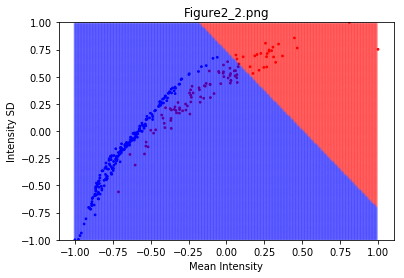

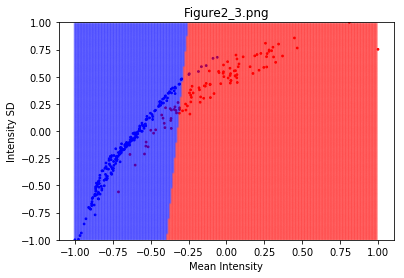

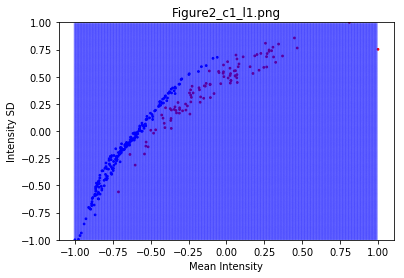

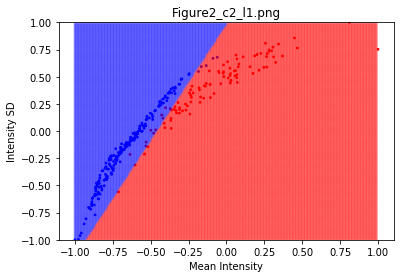

In [15]:
#L2 penalty, C=0.01 Figure 2.2     
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_2.png',plotType=1,model=lr_c1_l2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
#L2 penalty, C=2 Figure 2.3
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_3.png',plotType=1,model=lr_c2_l2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')
#L1 penalty, C=0.01
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_c1_l1.png',plotType=1,model=lr_c1_l1,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')
#L1 penalty, C=2
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_c2_l1.png',plotType=1,model=lr_c2_l1,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')

## 3 Support Vector Machines


In [16]:
c = np.logspace(-2,2,num=40,endpoint=True)
def cv_err(kernel, dim, gamma=1, degree=3):
    err_bar = []
    err_mean = []
    for index in range(40):
        if(kernel=='linear'):
            svc = SVC(kernel = kernel, gamma = gamma, C = c[index])
        elif(kernel=='poly'):
            svc = SVC(kernel = kernel, degree = degree, gamma = gamma, C = c[index])
        elif(kernel=='rbf'):
            svc = SVC(kernel = kernel, gamma = gamma, C =c[index]) 
        else:
            print('Kernel not defined.')
        if(dim==2):
            acc = cross_val_score(svc, simpleTrain, trainDigits, cv=10)
        elif(dim==256):
            acc = cross_val_score(svc, np.asarray(trainFeatures), trainDigits, cv=10)
        else:
            print('Dimension not defined.')
        err = 1 - acc
        err_mean.append(err.mean())
        err_bar.append(1.96 * err.std())
    return [err_mean,err_bar];

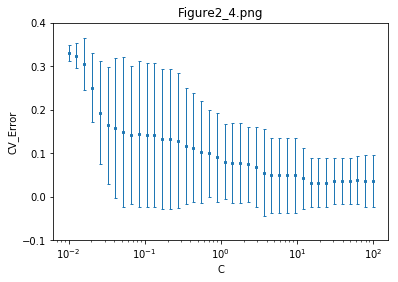

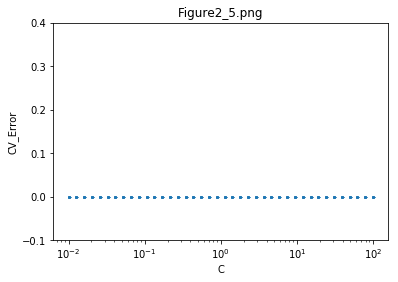

In [17]:
#Figure 2.4 SVM linear 2D CV_error
cv_err_2d_linear = cv_err('linear', 2, gamma='auto')
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_4.png',plotType=2,
     model=cv_err_2d_linear,subtitle=(''),ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')
#256 space Figure 2.5 
cv_err_256d_linear = cv_err('linear',256, gamma='auto')
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_5.png',plotType=2,
     model=cv_err_256d_linear,subtitle=(''),ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

In [18]:
cv_err_2d_linear

[[0.3300067204301076,
  0.3236559139784947,
  0.3042943548387097,
  0.24975134408602145,
  0.19268817204301075,
  0.1636491935483871,
  0.1570967741935484,
  0.14762096774193548,
  0.14127016129032258,
  0.14449596774193546,
  0.14116263440860216,
  0.14116263440860216,
  0.13168682795698924,
  0.13168682795698924,
  0.12846102150537636,
  0.11565860215053765,
  0.11243279569892475,
  0.10295698924731182,
  0.09962365591397851,
  0.09004704301075268,
  0.08047043010752689,
  0.07734543010752688,
  0.07734543010752688,
  0.07411962365591399,
  0.06766801075268818,
  0.05506720430107527,
  0.0484005376344086,
  0.0484005376344086,
  0.0484005376344086,
  0.0484005376344086,
  0.0419489247311828,
  0.03216397849462366,
  0.03216397849462366,
  0.03216397849462366,
  0.035389784946236555,
  0.035389784946236555,
  0.035389784946236555,
  0.038615591397849466,
  0.03549059139784947,
  0.03549059139784947],
 [0.01868260564032665,
  0.028689362829141824,
  0.05924179464010205,
  0.07955839939

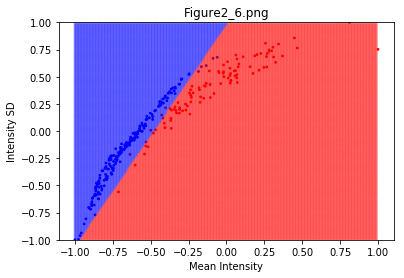

0.967948717948718

In [17]:
#2D space with optimal C  Figure 2.6
def c_opt(cv):
    upper_bound = np.asarray(cv[0])+np.asarray(cv[1])
    min_upper_bound = np.min(upper_bound)
    indx = np.argmin(upper_bound)
    return c[indx];
c_opt(cv_err_2d_linear)  #30.702906297578497
#SVM with optimal C  linear Figure 2.6
svm_opt = SVC(kernel = 'linear', C = c_opt(cv_err_2d_linear))
svm_opt_fit = svm_opt.fit(simpleTrain, trainDigits)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_6.png',plotType=1,model=svm_opt_fit,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
accuracy(svm_opt_fit)  #0.967948717948718

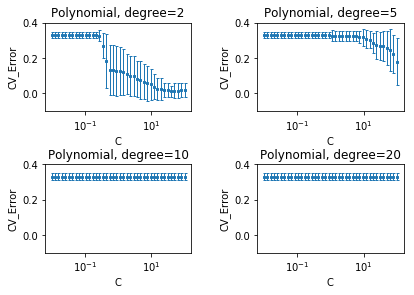

In [18]:
#polynomial kernel  2D
cv_err_2d_poly2 = cv_err('poly', 2, gamma='auto', degree=2)
cv_err_2d_poly5 = cv_err('poly', 2, gamma='auto', degree=5)
cv_err_2d_poly10 = cv_err('poly', 2, gamma='auto', degree=10)
cv_err_2d_poly20 = cv_err('poly', 2, gamma='auto', degree=20)
c_opt_2d_poly_models = (cv_err_2d_poly2,cv_err_2d_poly5,cv_err_2d_poly10,cv_err_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7.png',plotType=2,model=c_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')   

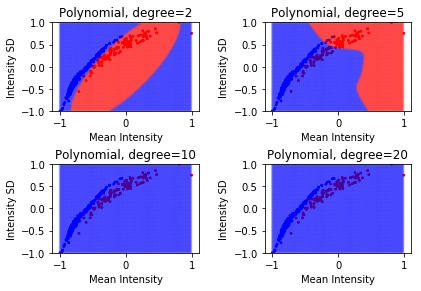

In [19]:
c_opt_2d_poly2 = c_opt(cv_err_2d_poly2) 
c_opt_2d_poly5 = c_opt(cv_err_2d_poly5)
c_opt_2d_poly10 = c_opt(cv_err_2d_poly10)
c_opt_2d_poly20 = c_opt(cv_err_2d_poly20)
c_opt_2d_poly2, c_opt_2d_poly5, c_opt_2d_poly10, c_opt_2d_poly20  
#(38.88155180308085, 100.0, 0.01, 0.01)

def opt_model(kernel, C, gamma=1, degree=3):
    opt_model = SVC(kernel=kernel,degree=degree,C=C,gamma=gamma)
    opt_model = opt_model.fit(simpleTrain,trainDigits)
    return opt_model;

svm_opt_2d_poly2 = opt_model('poly',c_opt_2d_poly2,gamma='auto',degree=2)
svm_opt_2d_poly5 = opt_model('poly',c_opt_2d_poly5,gamma='auto',degree=5)
svm_opt_2d_poly10 = opt_model('poly',c_opt_2d_poly10,gamma='auto',degree=10)
svm_opt_2d_poly20 = opt_model('poly',c_opt_2d_poly20,gamma='auto',degree=20)
#decision boundary for various polynomial degrees at their optimal C's 
svm_opt_2d_poly_models = (svm_opt_2d_poly2,svm_opt_2d_poly5,svm_opt_2d_poly10,svm_opt_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_8.png',plotType=1,model=svm_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

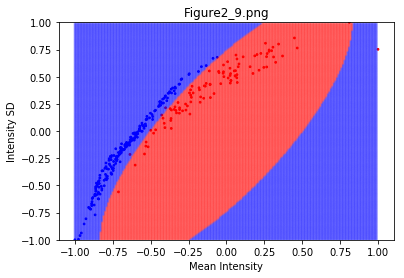

In [20]:
def min_upper(degree):
    upper_bound_degree = np.asarray(degree[0])+np.asarray(degree[1])
    min_upper = np.min(upper_bound_degree)
    return min_upper;
[min_upper(cv_err_2d_poly2), min_upper(cv_err_2d_poly5), 
 min_upper(cv_err_2d_poly10), min_upper(cv_err_2d_poly20)] 
#degree 2 and c=c_opt_2d_poly2 optimizes the 2D polynomial model. Save as Figure 2.9
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_9.png',plotType=1,model=svm_opt_2d_poly2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

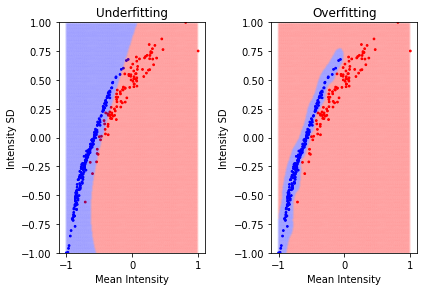

NameError: name 'svm_opt_2d_poly2' is not defined

In [19]:
svm_under = SVC(C=1, kernel='rbf', degree = 2, gamma=1).fit(simpleTrain,trainDigits)
svm_over = SVC(C=1, kernel='rbf', degree = 2, gamma=200).fit(simpleTrain,trainDigits)
plot(grid1=1,grid2=2,plotNum=2,fileName='Figure2_9.png',plotType=1,model=[svm_under,svm_over],
     subtitle=('Underfitting','Overfitting'),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
[1-svm_under.score(simpleTrain,trainDigits), 1-svm_under.score(simpleTest,testDigits),
1-svm_over.score(simpleTrain,trainDigits), 1-svm_over.score(simpleTest,testDigits)]
#[0.05769230769230771, 0.03763010408326661, 0.0, 0.012009607686148893]

In [22]:
[1- np.mean(cross_val_score(svm_under, simpleTrain, trainDigits, cv=10)),  
 1- np.mean(cross_val_score(svm_over, simpleTrain, trainDigits, cv=10))] 
#[0.06454301075268809, 0.006451612903225823]

[0.06454301075268809, 0.006451612903225823]

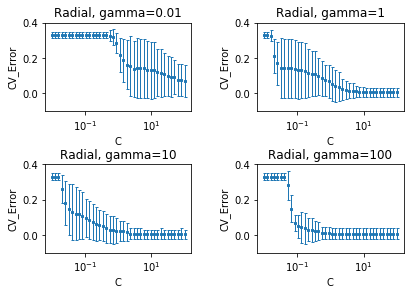

In [23]:
#kernel=‘rbf’
##gamma=0.01, 1, 10 and 100
svm_2d_rbf_gamma_models = [cv_err('rbf',2,gamma=0.01),cv_err('rbf',2,gamma=1),
                           cv_err('rbf',2,gamma=10),cv_err('rbf',2,gamma=100)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_10.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=1','Radial, gamma=10','Radial, gamma=100'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

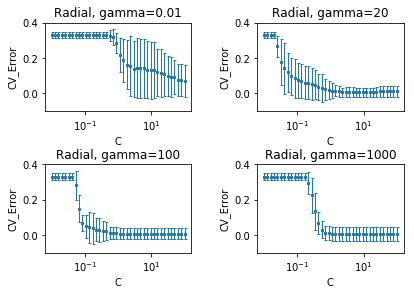

In [24]:
#kernel=‘rbf’
##gamma=0.01, 20, 100 and 1000
svm_2d_rbf_gamma_models = [cv_err('rbf',2,gamma=0.01),cv_err('rbf',2,gamma=20),
                           cv_err('rbf',2,gamma=100),cv_err('rbf',2,gamma=1000)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_extra.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=20','Radial, gamma=100','Radial, gamma=1000'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

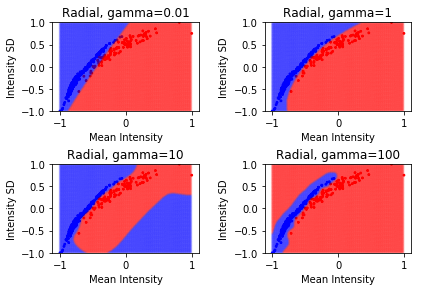

In [25]:
#radial with different gammas 
svm_2d_rad_g001 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=0.01)),gamma=0.01)
svm_2d_rad_g1 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=1)),gamma=1)
svm_2d_rad_g10 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=10)),gamma=10)
svm_2d_rad_g100 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=100)),gamma=100)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_11.png',plotType=1,
     model= [svm_2d_rad_g001,svm_2d_rad_g1,svm_2d_rad_g10,svm_2d_rad_g100],
     subtitle=('Radial, gamma=0.01','Radial, gamma=1','Radial, gamma=10','Radial, gamma=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

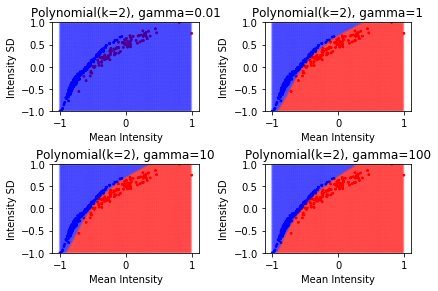

In [26]:
svm_2d_poly2_g001 = opt_model('poly',c_opt(cv_err('poly',2,gamma=0.01)),gamma=0.01)
svm_2d_poly2_g1 = opt_model('poly',c_opt(cv_err('poly',2,gamma=1)),gamma=1)
svm_2d_poly2_g10 = opt_model('poly',c_opt(cv_err('poly',2,gamma=10)),gamma=10)
svm_2d_poly2_g100 = opt_model('poly',c_opt(cv_err('poly',2,gamma=100)),gamma=100)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_12.png',plotType=1,
     model= [svm_2d_poly2_g001,svm_2d_poly2_g1,svm_2d_poly2_g10,svm_2d_poly2_g100],
     subtitle=('Polynomial(k=2), gamma=0.01','Polynomial(k=2), gamma=1',
               'Polynomial(k=2), gamma=10','Polynomial(k=2), gamma=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

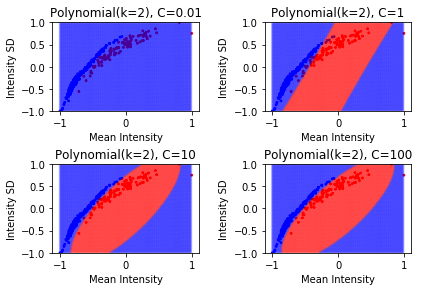

In [27]:
svm_2d_poly2_C001 = SVC(C=0.01,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C1 = SVC(C=1,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C10 = SVC(C=10,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C100 = SVC(C=100,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_13.png',plotType=1,
     model= [svm_2d_poly2_C001,svm_2d_poly2_C1,svm_2d_poly2_C10,svm_2d_poly2_C100],
     subtitle=('Polynomial(k=2), C=0.01','Polynomial(k=2), C=1',
               'Polynomial(k=2), C=10','Polynomial(k=2), C=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

In [ ]:
#cv_err_2d_poly2 = cv_err('poly', 2, gamma='auto', degree=2)
cv_err_2d_poly3 = cv_err('poly', 2, gamma='auto', degree=3)
cv_err_2d_poly4 = cv_err('poly', 2, gamma='auto', degree=4)
cv_err_2d_poly6 = cv_err('poly', 2, gamma='auto', degree=6)
c_opt_2d_poly_models_2 = (cv_err_2d_poly2,cv_err_2d_poly3,cv_err_2d_poly4,cv_err_2d_poly6)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7b.png',plotType=2,model=c_opt_2d_poly_models_2,
     subtitle=('Polynomial, degree=2','Polynomial, degree=3',
              'Polynomial, degree=4','Polynomial, degree=6'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

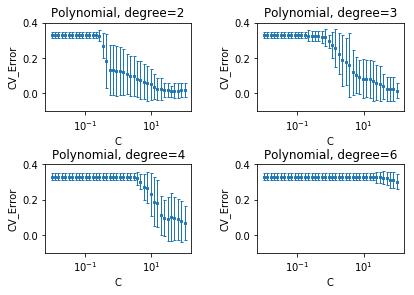